# Prev

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install --upgrade "kaleido==0.1.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 MB 7.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from gensim.models import word2vec
from gensim.models import KeyedVectors

import random

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

import seaborn as sns
import kaleido

In [4]:
# Cargar modelo pre-entrenado
embedding_file = '/content/drive/MyDrive/colab/GoogleNews-vectors-negative300.bin.gz'
word_vectors = KeyedVectors.load_word2vec_format(embedding_file, binary=True)

In [ ]:
def information_quantity(vector):
  inf_quant = np.dot(vector, vector)
  return inf_quant

In [ ]:
def generalisation(vector_1, vector_2, fun):
  if fun == 1:
    scalar_product = np.dot(vector_1, vector_2)
    squared_module_1 = np.dot(vector_1, vector_1)
    squared_module_2 = np.dot(vector_2, vector_2)
    generalized_vector = scalar_product*(vector_1 / squared_module_1 + vector_2 / squared_module_2)*0.5

  elif fun == 2:
    module_1 = np.sqrt(np.dot(vector_1, vector_1))
    module_2 = np.sqrt(np.dot(vector_2, vector_2))
    vector_module = min(module_1, module_2)/max(module_1, module_2)
    generalized_vector = np.zeros(300)
    for i in range(300):
      min_elem = min(abs(vector_1[i]), abs(vector_2[i]))
      if min_elem == vector_1[i] or min_elem == vector_2[i]:
        sign = 1
      else:
        sign = -1
      generalized_vector[i] = sign * np.sqrt(vector_module * abs(vector_1[i] * vector_2[i]))

  elif fun == 3:
    generalized_vector = np.zeros(300)
    for i in range(300):
      min_elem = min(abs(vector_1[i]), abs(vector_2[i]))
      if min_elem == vector_1[i] or min_elem == vector_2[i]:
        sign = 1
      else:
        sign = -1
      generalized_vector[i] = sign * min_elem

  return generalized_vector

def specification(vector_1, vector_2, fun):
  if fun == 1:
    specified_vector = vector_1 + vector_2

  elif fun == 2:
    module_1 = np.sqrt(np.dot(vector_1, vector_1))
    module_2 = np.sqrt(np.dot(vector_2, vector_2))
    vector_module = min(module_1, module_2)/max(module_1, module_2)
    specified_vector = np.zeros(300)
    for i in range(300):
      max_elem = max(abs(vector_1[i]), abs(vector_2[i]))
      if max_elem == vector_1[i] or max_elem == vector_2[i]:
        sign = 1
      else:
        sign = -1
      specified_vector[i] = sign * np.sqrt(vector_1[i]*vector_1[i] + vector_2[i]*vector_2[i] - vector_module * abs(vector_1[i] * vector_2[i]))

  elif fun == 3:
    specified_vector = np.zeros(300)
    for i in range(300):
      max_elem = max(abs(vector_1[i]), abs(vector_2[i]))
      if max_elem == vector_1[i] or max_elem == vector_2[i]:
        sign = 1
      else:
        sign = -1
      specified_vector[i] = sign * max_elem

  return specified_vector

In [ ]:
def similarity(vector_1, vector_2, sim_fun):
  if sim_fun == 1:
    scalar_product = np.dot(vector_1, vector_2)
    squared_module_1 = np.dot(vector_1, vector_1)
    squared_module_2 = np.dot(vector_2, vector_2)
    cosine = scalar_product / (squared_module_1 * squared_module_2)
    return cosine

  elif sim_fun == 2:
    return np.linalg.norm(vector_1 - vector_2)

  elif sim_fun == 3:
    return np.dot(vector_1, vector_2)

  elif sim_fun == 4:
    inf_quant_12 = information_quantity(vector_1) + information_quantity(vector_2) - np.dot(vector_1, vector_2)
    return information_quantity(vector_1) + information_quantity(vector_2) - 1.5 * inf_quant_12

  elif sim_fun == 5:
    inf_quant_12 = information_quantity(vector_1) + information_quantity(vector_2) - np.dot(vector_1, vector_2)
    if information_quantity(vector_1) >= information_quantity(vector_2):
      alpha_1 = 1.5
      alpha_2 = 0.5
    else:
      alpha_1 = 0.5
      alpha_2 = 1.5
    beta = 1.5
    return alpha_1 * information_quantity(vector_1) + alpha_2 * information_quantity(vector_2) - beta * inf_quant_12

  elif sim_fun == 6:
    inf_quant_12 = information_quantity(vector_1) + information_quantity(vector_2) - np.dot(vector_1, vector_2)
    if information_quantity(vector_1) >= information_quantity(vector_2):
      alpha_1 = 1.75
      alpha_2 = 0.75
    else:
      alpha_1 = 0.75
      alpha_2 = 1.75
    beta = 1.5
    return alpha_1 * information_quantity(vector_1) + alpha_2 * information_quantity(vector_2) - beta * inf_quant_12

  elif sim_fun == 7:
    inf_quant_12 = information_quantity(vector_1) + information_quantity(vector_2) - np.dot(vector_1, vector_2)
    if information_quantity(vector_1) >= information_quantity(vector_2):
      alpha_1 = 1.5
      alpha_2 = 0.5
    else:
      alpha_1 = 0.5
      alpha_2 = 1.5
    beta = 1
    return alpha_1 * information_quantity(vector_1) + alpha_2 * information_quantity(vector_2) - beta * inf_quant_12

  elif sim_fun == 8:
    inf_quant_12 = information_quantity(vector_1) + information_quantity(vector_2) - np.dot(vector_1, vector_2)
    if information_quantity(vector_1) >= information_quantity(vector_2):
      alpha_1 = 1.5
      alpha_2 = 0.5
    else:
      alpha_1 = 0.5
      alpha_2 = 1.5
    beta = 2
    return alpha_1 * information_quantity(vector_1) + alpha_2 * information_quantity(vector_2) - beta * inf_quant_12

  elif sim_fun == 9:
    inf_quant_12 = information_quantity(vector_1) + information_quantity(vector_2) - np.dot(vector_1, vector_2)
    if information_quantity(vector_1) >= information_quantity(vector_2):
      alpha_1 = 0.5
      alpha_2 = 1.5
    else:
      alpha_1 = 1.5
      alpha_2 = 0.5
    beta = 1.5
    return alpha_1 * information_quantity(vector_1) + alpha_2 * information_quantity(vector_2) - beta * inf_quant_12

  elif sim_fun == 10:
    inf_quant_12 = information_quantity(vector_1) + information_quantity(vector_2) - np.dot(vector_1, vector_2)
    if information_quantity(vector_1) >= information_quantity(vector_2):
      alpha_1 = 0.5
      alpha_2 = 1.5
    else:
      alpha_1 = 1.5
      alpha_2 = 0.5
    beta = 0.5
    return alpha_1 * information_quantity(vector_1) + alpha_2 * information_quantity(vector_2) - beta * inf_quant_12

  elif sim_fun == 11:
    inf_quant_12 = information_quantity(vector_1) + information_quantity(vector_2) - np.dot(vector_1, vector_2)
    if information_quantity(vector_1) >= information_quantity(vector_2):
      alpha_1 = 1.5
      alpha_2 = 1
    else:
      alpha_1 = 1
      alpha_2 = 1.5
    beta = 1.5
    return alpha_1 * information_quantity(vector_1) + alpha_2 * information_quantity(vector_2) - beta * inf_quant_12

In [5]:
def f_fun(alfa, mu, vector_1, vector_2):
  return (vector_1 + vector_2)/np.sqrt(np.dot(vector_1+vector_2, vector_1+vector_2)) * np.sqrt(alfa*(np.dot(vector_1, vector_1) + np.dot(vector_2, vector_2)) - mu*(np.dot(vector_1, vector_2)))

def projection(text, embedding_model, emb_fun):
  text = text.lower()
  tokens = text.split()
  vector_sum = np.zeros(300)
  vector = np.zeros(300)
  if text == " ":
    try:
      vector_sum = embedding_model[token]
    except:
      vector_sum = vector_sum
    return vector_sum


  elif emb_fun in [1,2]:
    i = 0
    for token in tokens:
      if token in embedding_model:
        vector_sum += embedding_model[token]
        working_vector = np.zeros(300)
        working_vector = embedding_model[token]
        vector_sum += working_vector
        i += 1
    if emb_fun == 1:
      return vector_sum
    elif emb_fun == 2:
      return vector_sum / i

  elif emb_fun in [3,4,5]:
    for token in tokens:
      if token in embedding_model:
        vector = embedding_model[token]
        ind = tokens.index(token)
        break
    for token in tokens[ind+1:]:
      if token in embedding_model:

        if emb_fun == 3:
          #f_join: alfa = 1, mu = 1
          vector = f_fun(1, 1, vector, embedding_model[token])

        elif emb_fun == 4:
          #f_ind: alfa = 1, mu = 0
          vector = f_fun(1, 0, vector, embedding_model[token])

        elif emb_fun == 5:
          #f_inf: alfa = 1, mu = min module / max module
          vector_2 = embedding_model[token]
          module_1 = np.sqrt(np.dot(vector, vector))
          module_2 = np.sqrt(np.dot(vector_2, vector_2))
          vector = f_fun(1, min(module_1, module_2)/max(module_1, module_2), vector, vector_2)
    return vector

In [6]:
def test_property(logic_value):
  if logic_value:
    return 1
  else:
    return 0

# definition

In [7]:
rows = ['Constraint 1 - Injectivity', 'Constraint 2 - Zero informativeness', 'Constraint 3 - Infinite informativeness', 'Constraint 4 - Upper and lower bounds',
        'Constraint 5 - Commutativity', 'Constraint 6 - Associativity', 'Constraint 7 - Distributiveness', 'Constraint 8 - Idempotency',
        'Constraint 9 - Identity', 'Constraint 10 - Similarity monotonicity', 'Constraint 11 - Self-similarity', 'Constraint 12 - Asymmetricity', 'Constraint 1 - Injectivity', 'Constraint 2 - Zero informativeness', 'Constraint 3 - Infinite informativeness', 'Constraint 4 - Upper and lower bounds',
        'Constraint 5 - Commutativity', 'Constraint 6 - Associativity', 'Constraint 7 - Distributiveness', 'Constraint 8 - Idempotency',
        'Constraint 9 - Identity', 'Constraint 10 - Similarity monotonicity', 'Constraint 11 - Self-similarity', 'Constraint 12 - Asymmetricity', 'Constraint 1 - Injectivity', 'Constraint 2 - Zero informativeness', 'Constraint 3 - Infinite informativeness', 'Constraint 4 - Upper and lower bounds',
        'Constraint 5 - Commutativity', 'Constraint 6 - Associativity', 'Constraint 7 - Distributiveness', 'Constraint 8 - Idempotency',
        'Constraint 9 - Identity', 'Constraint 10 - Similarity monotonicity', 'Constraint 11 - Self-similarity', 'Constraint 12 - Asymmetricity']

columns = []
for embed in ['Sum of Vectors', 'Average', 'F_joint', 'F_ind', 'F_inf']: #embedding
  for spec_gen in ['Algebraic','Information','Fuzzy']: #spec and gen functions
    for similarity_function in ['Cosine','Euclidean','Dot','ICM_100_100_150','ICM_150_050_150','ICM_175_075_15','ICM_150_050_100','ICM_150_050_200','ICM_050_150_150','ICM_050_150_050','ICM_150_100_150']: #similarity

      columns.append(embed + " - " + spec_gen + " - " + similarity_function)

results = pd.DataFrame(0, index=rows, columns=columns)

In [8]:
sequences = pd.read_excel('/content/drive/MyDrive/colab/sequences.xlsx')
ancestors = pd.read_excel('/content/drive/MyDrive/colab/ancestors.xlsx')
summaries = pd.read_excel('/content/drive/MyDrive/colab/summaries.xlsx')
#summaries = pd.read_excel('/content/drive/MyDrive/colab/long_summaries.xlsx')

# word sequences

In [9]:
print('Progress: 0%')

q = 0
m = -1
for k in range(5): #embedding
  k += 1
  for h in range (3): #spec and gen functions
    h += 1
    for j in range(11): #similarity
      j += 1
      m += 1

      for i in range(len(sequences)):
        q += 1
        vectors = [sequences.iloc[i][0], sequences.iloc[i][1], sequences.iloc[i][2]]
        vectors.sort()

        text_1 = vectors[2]
        text_2 = vectors[1]
        text_3 = vectors[0]

        # given text_1, text_2, text_3
        vector_1 = projection(text_1, word_vectors, k)
        vector_2 = projection(text_2, word_vectors, k)
        vector_3 = projection(text_3, word_vectors, k)
        vector_12 = projection(text_1 + " " + text_2, word_vectors, k)
        vector_123 = projection(text_1 + " " + text_2 + " " + text_3, word_vectors, k)

        # Test 1
        results.iloc[0][m] += test_property(information_quantity(vector_1) != information_quantity(vector_2))

        # Test 2
        results.iloc[1][m] += test_property(information_quantity(projection(" ", word_vectors, k)) == 0)

        # Test 18
        results.iloc[2][m] += test_property(information_quantity(vector_1) < information_quantity(vector_12))

        # Test 19
        results.iloc[3][m] += test_property((information_quantity(vector_1) < information_quantity(specification(vector_1, vector_2, h)) and information_quantity(vector_2) < information_quantity(specification(vector_1, vector_2, h))))

        # Test 20
        results.iloc[3][m] += test_property((information_quantity(vector_1) > information_quantity(generalisation(vector_1, vector_2, h)) and information_quantity(vector_2) > information_quantity(generalisation(vector_1, vector_2, h))))

        # Test 3
        results.iloc[4][m] += test_property((specification(vector_1, vector_2, h) == specification(vector_2, vector_1, h)).all())

        # Test 4
        results.iloc[4][m] += test_property((generalisation(vector_1, vector_2, h) == generalisation(vector_2, vector_1, h)).all())

        # Test 5
        results.iloc[5][m] += test_property((specification(specification(vector_1, vector_2, h), vector_3, h) == specification(vector_1, specification(vector_2, vector_3, h), h)).all())

        # Test 6
        results.iloc[5][m] += test_property((generalisation(generalisation(vector_1, vector_2, h), vector_3, h) == generalisation(vector_1, generalisation(vector_2, vector_3, h), h)).all())

        # Test 7
        results.iloc[6][m] += test_property((specification(generalisation(vector_1, vector_2, h), vector_3, h) == specification(vector_1, generalisation(vector_2, vector_3, h), h)).all())

        # Test 8
        results.iloc[6][m] += test_property((generalisation(specification(vector_1, vector_2, h), vector_3, h) == generalisation(vector_1, specification(vector_2, vector_3, h), h)).all())

        # Test 9
        results.iloc[7][m] += test_property(similarity(generalisation(generalisation(vector_1, vector_2, h), vector_1, h) , generalisation(vector_1, vector_2, h), j) > similarity(generalisation(generalisation(vector_1, vector_2, h), vector_1, h) , generalisation(generalisation(vector_1, vector_2, h), vector_3, h), j))

        # Test 10
        results.iloc[7][m] += test_property(similarity(specification(specification(vector_1, vector_2, h), vector_2, h) , specification(vector_1, vector_2, h), j) > similarity(specification(specification(vector_1, vector_2, h), vector_2, h) , specification(specification(vector_1, vector_2, h), vector_3, h), j))

        # Test 11
        results.iloc[8][m] += test_property(similarity(specification(generalisation(vector_1, vector_2, h), vector_1, h) , vector_1, j) > similarity(specification(generalisation(vector_1, vector_2, h), vector_1, h) , vector_2, j))

        # Test 12
        results.iloc[8][m] += test_property(similarity(generalisation(specification(vector_1, vector_2, h), vector_1, h) , vector_1, j) > similarity(specification(specification(vector_1, vector_2, h), vector_1, h) , vector_2, j))

        # Test 13
        results.iloc[9][m] += test_property(similarity(specification(vector_1, vector_2, h), vector_1, j) > similarity(vector_1, vector_2, j))

        # Test 14
        results.iloc[9][m] += test_property(similarity(generalisation(vector_1, vector_2, h), vector_1, j) > similarity(vector_1, vector_2, j))

        # Test 15
        results.iloc[10][m] += test_property(similarity(vector_1, vector_1, j) > similarity(vector_2, vector_2, j))

        # Test 16
        results.iloc[11][m] += test_property(similarity(vector_1, specification(vector_1, vector_2, h), j) < similarity(specification(vector_1, vector_2, h), vector_1, j))

        # Test 17
        results.iloc[11][m] += test_property(similarity(generalisation(vector_1, vector_2, h), vector_1, j) < similarity(vector_1, generalisation(vector_1, vector_2, h), j))

        if q % 750 == 0:
          print('Progress: ' + str(round(q *100 /(len(sequences) * 165),2)) + '%')
print('Progress: 100%!')

Progress: 0%
Progress: 3.48%
Progress: 6.97%
Progress: 10.45%
Progress: 13.94%
Progress: 17.42%
Progress: 20.91%
Progress: 24.39%
Progress: 27.88%
Progress: 31.36%
Progress: 34.85%
Progress: 38.33%
Progress: 41.82%
Progress: 45.3%
Progress: 48.79%
Progress: 52.27%
Progress: 55.76%
Progress: 59.24%
Progress: 62.73%
Progress: 66.21%
Progress: 69.7%
Progress: 73.18%
Progress: 76.67%
Progress: 80.15%
Progress: 83.64%
Progress: 87.12%
Progress: 90.61%
Progress: 94.09%
Progress: 97.58%
Progress: 100%!


# ancestors

In [10]:
print('Progress: 0%')

q = 0
m = -1
for k in range(5): #embedding
  k += 1
  for h in range (3): #spec and gen functions
    h += 1
    for j in range(11): #similarity
      j += 1
      m += 1
      for i in range(len(ancestors)):
        q += 1
        text_1 = ancestors.iloc[i][0] # w
        text_1b = ancestors.iloc[i][1] # w'
        text_2 = ancestors.iloc[i][2] # ancestor w_a
        text_3 = ancestors.iloc[i][3] # ancestor w_aa

        # given text_1, text_2, text_3
        vector_1 = projection(text_1, word_vectors, k)
        vector_1b = projection(text_1b, word_vectors, k)
        vector_2 = projection(text_2, word_vectors, k)
        vector_3 = projection(text_3, word_vectors, k)
        vector_n = projection('cheese', word_vectors, k)

        # Test 1
        results.iloc[12][m] += test_property(information_quantity(vector_1) != information_quantity(vector_2))

        # Test 2
        results.iloc[13][m] += test_property(information_quantity(projection(" ", word_vectors, k)) == 0)

        # Test 21
        results.iloc[14][m] += test_property(information_quantity(vector_2) != information_quantity(vector_1))

        # Test 22
        results.iloc[15][m] += test_property(information_quantity(generalisation(vector_1,vector_2, h)) < information_quantity(generalisation(vector_1,vector_n, h)))

        # Test 23
        results.iloc[15][m] += test_property(information_quantity(specification(vector_1,vector_2, h)) > information_quantity(specification(vector_1,vector_n, h)))

        # Test 3
        results.iloc[16][m] += test_property((specification(vector_1, vector_2, h) == specification(vector_2, vector_1, h)).all())

        # Test 4
        results.iloc[16][m] += test_property((generalisation(vector_1, vector_2, h) == generalisation(vector_2, vector_1, h)).all())

        # Test 5
        results.iloc[17][m] += test_property((specification(specification(vector_1, vector_2, h), vector_1b, h) == specification(vector_1, specification(vector_2, vector_1b, h), h)).all())

        # Test 6
        results.iloc[17][m] += test_property((generalisation(generalisation(vector_1, vector_2, h), vector_1b, h) == generalisation(vector_1, generalisation(vector_2, vector_1b, h), h)).all())

        # Test 7
        results.iloc[18][m] += test_property((specification(generalisation(vector_1, vector_2, h), vector_1b, h) == specification(vector_1, generalisation(vector_2, vector_1b, h), h)).all())

        # Test 8
        results.iloc[18][m] += test_property((generalisation(specification(vector_1, vector_2, h), vector_1b, h) == generalisation(vector_1, specification(vector_2, vector_1b, h), h)).all())

        # Test 9
        results.iloc[19][m] += test_property(similarity(generalisation(generalisation(vector_1, vector_2, h), vector_1, h), generalisation(vector_1, vector_2, h), j) > similarity(generalisation(generalisation(vector_1, vector_2, h), vector_1, h) , generalisation(generalisation(vector_1, vector_2, h), vector_3, h), j))

        # Test 10
        results.iloc[19][m] += test_property(similarity(specification(specification(vector_1, vector_2, h), vector_2, h), specification(vector_1, vector_2, h), j) > similarity(specification(specification(vector_1, vector_2, h), vector_2, h) , specification(specification(vector_1, vector_2, h), vector_3, h), j))

        # Test 11
        results.iloc[20][m] += test_property(similarity(specification(generalisation(vector_1, vector_2, h), vector_1, h), vector_1, j) > similarity(specification(generalisation(vector_1, vector_2, h), vector_1, h) , vector_2, j))

        # Test 12
        results.iloc[20][m] += test_property(similarity(generalisation(specification(vector_1, vector_2, h), vector_1, h), vector_1, j) > similarity(generalisation(specification(vector_1, vector_2, h), vector_1, h) , vector_2, j))

        # Test 13
        results.iloc[21][m] += test_property(similarity(specification(vector_1, vector_2, h), vector_1, j) > similarity(vector_1, vector_2, j))

        # Test 14
        results.iloc[21][m] += test_property(similarity(generalisation(vector_1, vector_2, h), vector_1, j) > similarity(vector_1, vector_2, j))

        # Test 15
        results.iloc[22][m] += test_property(similarity(vector_1, vector_1, j) > similarity(vector_2, vector_2, j))

        # Test 16
        results.iloc[23][m] += test_property(similarity(vector_1, specification(vector_1, vector_2, h), j) < similarity(specification(vector_1, vector_2, h), vector_1, j))

        # Test 17
        results.iloc[23][m] += test_property(similarity(generalisation(vector_1, vector_2, h), vector_1, j) < similarity(vector_1, generalisation(vector_1, vector_2, h), j))

        if q % 386 == 0:
          print('Progress: ' + str(round(q *100 /(len(ancestors) * 165),2)) + '%')
print('Progress: 100%!')

Progress: 0%
Progress: 2.34%
Progress: 4.68%
Progress: 7.02%
Progress: 9.36%
Progress: 11.7%
Progress: 14.04%
Progress: 16.38%
Progress: 18.72%
Progress: 21.05%
Progress: 23.39%
Progress: 25.73%
Progress: 28.07%
Progress: 30.41%
Progress: 32.75%
Progress: 35.09%
Progress: 37.43%
Progress: 39.77%
Progress: 42.11%
Progress: 44.45%
Progress: 46.79%
Progress: 49.13%
Progress: 51.47%
Progress: 53.81%
Progress: 56.15%
Progress: 58.48%
Progress: 60.82%
Progress: 63.16%
Progress: 65.5%
Progress: 67.84%
Progress: 70.18%
Progress: 72.52%
Progress: 74.86%
Progress: 77.2%
Progress: 79.54%
Progress: 81.88%
Progress: 84.22%
Progress: 86.56%
Progress: 88.9%
Progress: 91.24%
Progress: 93.58%
Progress: 95.92%
Progress: 98.25%
Progress: 100%!


# summaries

In [11]:
print('Progress: 0%')

q = 0
m = -1
for k in range(5): #embedding
  k += 1
  for h in range (3): #spec and gen functions
    h += 1
    for j in range(11): #similarity
      j += 1
      m += 1
      for i in range(len(summaries)):
        q += 1
        text_1 = summaries.iloc[i][0] # r
        text_2 = summaries.iloc[i][1] # r_1
        text_3 = summaries.iloc[i][2] # r_2

        # given text_1, text_2, text_3
        vector_1 = projection(text_1, word_vectors, k)
        vector_2 = projection(text_2, word_vectors, k)
        vector_3 = projection(text_3, word_vectors, k)

        # Test 1
        results.iloc[24][m] += test_property(information_quantity(vector_1) != information_quantity(vector_2))

        # Test 2
        results.iloc[25][m] += test_property(information_quantity(projection(" ", word_vectors, k)) == 0)

        # Test 24
        results.iloc[26][m] += test_property(information_quantity(vector_2) < information_quantity(vector_1))

        # Test 25
        results.iloc[27][m] += test_property((information_quantity(vector_1) < information_quantity(specification(vector_1, vector_2, h)) and information_quantity(vector_2) < information_quantity(specification(vector_1, vector_2, h))))

        # Test 26
        results.iloc[27][m] += test_property((information_quantity(vector_1) > information_quantity(generalisation(vector_1, vector_2, h)) and information_quantity(vector_2) > information_quantity(generalisation(vector_1, vector_2, h))))

        # Test 3
        results.iloc[28][m] += test_property((specification(vector_1, vector_2, h) == specification(vector_2, vector_1, h)).all())

        # Test 4
        results.iloc[28][m] += test_property((generalisation(vector_1, vector_2, h) == generalisation(vector_2, vector_1, h)).all())

        # Test 5
        results.iloc[29][m] += test_property((specification(specification(vector_1, vector_2, h), vector_1b, h) == specification(vector_1, specification(vector_2, vector_1b, h), h)).all())

        # Test 6
        results.iloc[29][m] += test_property((generalisation(generalisation(vector_1, vector_2, h), vector_1b, h) == generalisation(vector_1, generalisation(vector_2, vector_1b, h), h)).all())

        # Test 7
        results.iloc[30][m] += test_property((specification(generalisation(vector_1, vector_2, h), vector_1b, h) == specification(vector_1, generalisation(vector_2, vector_1b, h), h)).all())

        # Test 8
        results.iloc[30][m] += test_property((generalisation(specification(vector_1, vector_2, h), vector_1b, h) == generalisation(vector_1, specification(vector_2, vector_1b, h), h)).all())

        # Test 9
        results.iloc[31][m] += test_property(similarity(generalisation(generalisation(vector_1, vector_2, h), vector_1, h), generalisation(vector_1, vector_2, h), j) > similarity(generalisation(generalisation(vector_1, vector_2, h), vector_1, h) , generalisation(generalisation(vector_1, vector_2, h), vector_3, h), j))

        # Test 10
        results.iloc[31][m] += test_property(similarity(specification(specification(vector_1, vector_2, h), vector_2, h), specification(vector_1, vector_2, h), j) > similarity(specification(specification(vector_1, vector_2, h), vector_2, h) , specification(specification(vector_1, vector_2, h), vector_3, h), j))

        # Test 11
        results.iloc[32][m] += test_property(similarity(specification(generalisation(vector_1, vector_2, h), vector_1, h), vector_1, j) > similarity(specification(generalisation(vector_1, vector_2, h), vector_1, h) , vector_2, j))

        # Test 12
        results.iloc[32][m] += test_property(similarity(generalisation(specification(vector_1, vector_2, h), vector_1, h), vector_1, j) > similarity(generalisation(specification(vector_1, vector_2, h), vector_1, h) , vector_2, j))

        # Test 13
        results.iloc[33][m] += test_property(similarity(specification(vector_1, vector_2, h), vector_1, j) > similarity(vector_1, vector_2, j))

        # Test 14
        results.iloc[33][m] += test_property(similarity(generalisation(vector_1, vector_2, h), vector_1, j) > similarity(vector_1, vector_2, j))

        # Test 15
        results.iloc[34][m] += test_property(similarity(vector_1, vector_1, j) > similarity(vector_2, vector_2, j))

        # Test 16
        results.iloc[35][m] += test_property(similarity(vector_1, specification(vector_1, vector_2, h), j) < similarity(specification(vector_1, vector_2, h), vector_1, j))

        # Test 17
        results.iloc[35][m] += test_property(similarity(generalisation(vector_1, vector_2, h), vector_1, j) < similarity(vector_1, generalisation(vector_1, vector_2, h), j))

        if q % 345 == 0:
          print('Progress: ' + str(round(q *100 /(len(summaries) * 165),2)) + '%')
print('Progress: 100%!')

Progress: 0%
Progress: 4.18%
Progress: 8.36%
Progress: 12.55%
Progress: 16.73%
Progress: 20.91%
Progress: 25.09%
Progress: 29.27%
Progress: 33.45%
Progress: 37.64%
Progress: 41.82%
Progress: 46.0%
Progress: 50.18%
Progress: 54.36%
Progress: 58.55%
Progress: 62.73%
Progress: 66.91%
Progress: 71.09%
Progress: 75.27%
Progress: 79.45%
Progress: 83.64%
Progress: 87.82%
Progress: 92.0%
Progress: 96.18%
Progress: 100%!


# Results comparison

In [12]:
test_number = [1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2]
sequence_normalizer = [x * len(sequences) for x in test_number]
ancestors_normalizer = [x * len(ancestors) for x in test_number]
summaries_normalizer = [x * len(summaries) for x in test_number]

normalizer = sequence_normalizer + ancestors_normalizer + summaries_normalizer

normalized_results = results.div(normalizer, axis=0).round(2)

In [13]:
normalized_results.to_csv('/content/drive/MyDrive/colab/normalized_results.csv')

In [14]:
groups = [normalized_results.iloc[i:i+12] for i in range(0, len(normalized_results), 12)]

sums = [group.sum() for group in groups]

sums_df = pd.concat(sums, axis=1, keys=[f'Group_{i+1}' for i in range(len(groups))])

total_sum = normalized_results.sum()
sums_df['Total_Sum'] = total_sum

In [15]:
analysis_df = sums_df['Total_Sum']

# Embedding analysis

In [16]:
# Dividir la columna en segmentos de 33 elementos cada uno
segmentos = [analysis_df.iloc[i:i+33].reset_index(drop=True) for i in range(0, len(analysis_df), 33)]

# Crear un nuevo DataFrame con las columnas deseadas
nuevo_df = pd.concat(segmentos, axis=1, ignore_index=True)

nuevo_df.columns = ['Sum of Vectors', 'Average', 'F_joint', 'F_ind', 'F_inf']

# Nombrar las filas del nuevo DataFrame
nuevo_df.index = ['Algebraic - Cosine',
'Algebraic - Euclidean',
'Algebraic - Dot',
'Algebraic - ICM_100_100_150',
'Algebraic - ICM_150_050_150',
'Algebraic - ICM_175_075_15',
'Algebraic - ICM_150_050_100',
'Algebraic - ICM_150_050_200',
'Algebraic - ICM_050_150_150',
'Algebraic - ICM_050_150_050',
'Algebraic - ICM_150_100_150',
'Information - Cosine',
'Information - Euclidean',
'Information - Dot',
'Information - ICM_100_100_150',
'Information - ICM_150_050_150',
'Information - ICM_175_075_15',
'Information - ICM_150_050_100',
'Information - ICM_150_050_200',
'Information - ICM_050_150_150',
'Information - ICM_050_150_050',
'Information - ICM_150_100_150',
'Fuzzy - Cosine',
'Fuzzy - Euclidean',
'Fuzzy - Dot',
'Fuzzy - ICM_100_100_150',
'Fuzzy - ICM_150_050_150',
'Fuzzy - ICM_175_075_15',
'Fuzzy - ICM_150_050_100',
'Fuzzy - ICM_150_050_200',
'Fuzzy - ICM_050_150_150',
'Fuzzy - ICM_050_150_050',
'Fuzzy - ICM_150_100_150'  ]

latex_table = nuevo_df.to_latex()
print(latex_table)

\begin{tabular}{lrrrrr}
\toprule
{} &  Sum of Vectors &  Average &  F\_joint &  F\_ind &  F\_inf \\
\midrule
Algebraic - Cosine            &           22.34 &    22.35 &    22.62 &  21.58 &  21.71 \\
Algebraic - Euclidean         &           17.01 &    15.37 &    16.39 &  16.24 &  16.27 \\
Algebraic - Dot               &           23.63 &    18.89 &    22.14 &  22.52 &  22.45 \\
Algebraic - ICM\_100\_100\_150   &           25.15 &    21.18 &    24.24 &  24.33 &  24.40 \\
Algebraic - ICM\_150\_050\_150   &           26.03 &    22.41 &    25.18 &  25.28 &  25.33 \\
Algebraic - ICM\_175\_075\_15    &           25.05 &    21.11 &    24.29 &  24.32 &  24.42 \\
Algebraic - ICM\_150\_050\_100   &           24.90 &    20.89 &    24.16 &  24.17 &  24.26 \\
Algebraic - ICM\_150\_050\_200   &           24.51 &    21.91 &    23.61 &  23.60 &  23.62 \\
Algebraic - ICM\_050\_150\_150   &           23.75 &    19.19 &    21.86 &  22.47 &  22.38 \\
Algebraic - ICM\_050\_150\_050   &           23.18 &  

<ipython-input-16-38826a098175>:44: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = nuevo_df.to_latex()


<ipython-input-17-a825dcd4374c>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


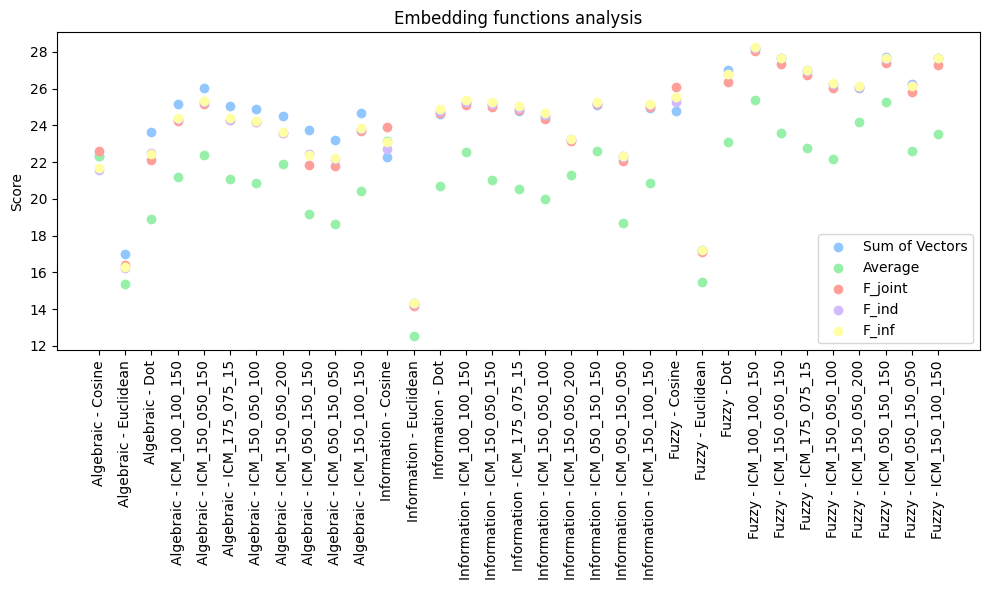

In [17]:
# Configurar el estilo y colores contrastantes
sns.set_palette("tab10")  # Utilizar una paleta de colores de Seaborn
plt.style.use('seaborn-pastel')

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
for columna in nuevo_df.columns:
    plt.scatter(nuevo_df.index, nuevo_df[columna], label=columna)

# Configurar etiquetas y título

plt.ylabel('Score')
plt.title('Embedding functions analysis')
plt.xticks(rotation='vertical')  # Rotar las etiquetas del eje X en vertical
plt.legend()

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño
plt.savefig('/content/drive/MyDrive/colab/embedding_analysis.png', dpi=300)


plt.show()

# Specification and generalization fucntions analysis

In [18]:
# Definir los índices de los grupos
indices_grupo1 = list(range(0, 11)) + list(range(33, 44)) + list(range(66, 77))+ list(range(99, 110))+ list(range(132, 143))
indices_grupo2 = list(range(11, 22)) + list(range(44, 55)) + list(range(77, 88))+ list(range(110, 121))+ list(range(143, 154))
indices_grupo3 = list(range(22, 33)) + list(range(55, 66)) + list(range(88, 99))+ list(range(121, 132))+ list(range(154, 165))

# Crear los grupos
grupo1 = list(analysis_df.iloc[indices_grupo1])
grupo2 = list(analysis_df.iloc[indices_grupo2])
grupo3 = list(analysis_df.iloc[indices_grupo3])

# Crear el DataFrame
nombres_filas = [
'Sum of Vectors - Cosine',
'Sum of Vectors - Euclidean',
'Sum of Vectors - Dot',
'Sum of Vectors - ICM_100_100_150',
'Sum of Vectors - ICM_150_050_150',
'Sum of Vectors - ICM_175_075_15',
'Sum of Vectors - ICM_150_050_100',
'Sum of Vectors - ICM_150_050_200',
'Sum of Vectors - ICM_050_150_150',
'Sum of Vectors - ICM_050_150_050',
'Sum of Vectors - ICM_150_100_150',
'Average - Cosine',
'Average - Euclidean',
'Average - Dot',
'Average - ICM_100_100_150',
'Average - ICM_150_050_150',
'Average - ICM_175_075_15',
'Average - ICM_150_050_100',
'Average - ICM_150_050_200',
'Average - ICM_050_150_150',
'Average - ICM_050_150_050',
'Average - ICM_150_100_150',
'F_joint - Cosine',
'F_joint - Euclidean',
'F_joint - Dot',
'F_joint - ICM_100_100_150',
'F_joint - ICM_150_050_150',
'F_joint - ICM_175_075_15',
'F_joint - ICM_150_050_100',
'F_joint - ICM_150_050_200',
'F_joint - ICM_050_150_150',
'F_joint - ICM_050_150_050',
'F_joint - ICM_150_100_150',
'F_ind - Cosine',
'F_ind - Euclidean',
'F_ind - Dot',
'F_ind - ICM_100_100_150',
'F_ind - ICM_150_050_150',
'F_ind - ICM_175_075_15',
'F_ind - ICM_150_050_100',
'F_ind - ICM_150_050_200',
'F_ind - ICM_050_150_150',
'F_ind - ICM_050_150_050',
'F_ind - ICM_150_100_150',
'F_inf - Cosine',
'F_inf - Euclidean',
'F_inf - Dot',
'F_inf - ICM_100_100_150',
'F_inf - ICM_150_050_150',
'F_inf - ICM_175_075_15',
'F_inf - ICM_150_050_100',
'F_inf - ICM_150_050_200',
'F_inf - ICM_050_150_150',
'F_inf - ICM_050_150_050',
'F_inf - ICM_150_100_150'
    ]

data = {'Algebraic': grupo1, 'Information': grupo2, 'Fuzzy': grupo3}
nuevo_df = pd.DataFrame(data, index=nombres_filas)

latex_table = nuevo_df.to_latex()
print(latex_table)

\begin{tabular}{lrrr}
\toprule
{} &  Algebraic &  Information &  Fuzzy \\
\midrule
Sum of Vectors - Cosine          &      22.34 &        22.26 &  24.80 \\
Sum of Vectors - Euclidean       &      17.01 &        14.31 &  17.24 \\
Sum of Vectors - Dot             &      23.63 &        24.64 &  26.99 \\
Sum of Vectors - ICM\_100\_100\_150 &      25.15 &        25.22 &  28.20 \\
Sum of Vectors - ICM\_150\_050\_150 &      26.03 &        25.09 &  27.68 \\
Sum of Vectors - ICM\_175\_075\_15  &      25.05 &        24.80 &  27.01 \\
Sum of Vectors - ICM\_150\_050\_100 &      24.90 &        24.45 &  26.27 \\
Sum of Vectors - ICM\_150\_050\_200 &      24.51 &        23.23 &  26.05 \\
Sum of Vectors - ICM\_050\_150\_150 &      23.75 &        25.13 &  27.72 \\
Sum of Vectors - ICM\_050\_150\_050 &      23.18 &        22.31 &  26.23 \\
Sum of Vectors - ICM\_150\_100\_150 &      24.65 &        24.95 &  27.67 \\
Average - Cosine                 &      22.35 &        23.14 &  25.51 \\
Average - Euclide

<ipython-input-18-21592af1f930>:73: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = nuevo_df.to_latex()


<ipython-input-19-bd10c2fd90a9>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


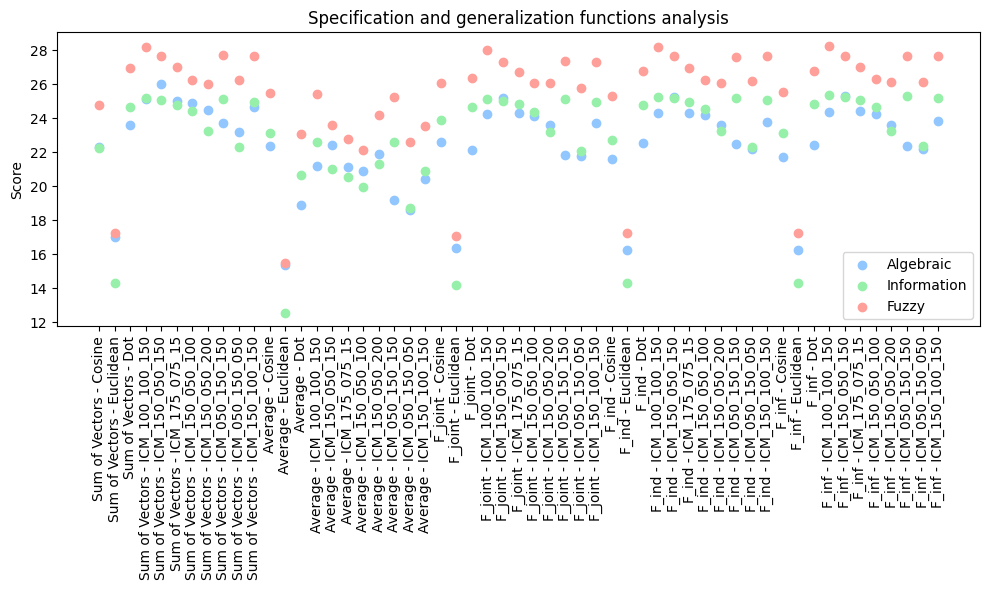

In [19]:
# Configurar el estilo y colores contrastantes
sns.set_palette("tab10")  # Utilizar una paleta de colores de Seaborn
plt.style.use('seaborn-pastel')

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
for columna in nuevo_df.columns:
    plt.scatter(nuevo_df.index, nuevo_df[columna], label=columna)

# Configurar etiquetas y título

plt.ylabel('Score')
plt.title('Specification and generalization functions analysis')
plt.xticks(rotation='vertical')  # Rotar las etiquetas del eje X en vertical
plt.legend()

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño
plt.savefig('/content/drive/MyDrive/colab/generalisation_analysis.png', dpi=300)


plt.show()

# Similarity function analysis

In [20]:
# Definir los índices de los grupos
indices_grupo1 = list(range(0, 165, 11))
indices_grupo2 = [elem + 1 for elem in indices_grupo1]
indices_grupo3 = [elem + 2 for elem in indices_grupo1]
indices_grupo4 = [elem + 3 for elem in indices_grupo1]
indices_grupo5 = [elem + 4 for elem in indices_grupo1]
indices_grupo6 = [elem + 5 for elem in indices_grupo1]
indices_grupo7 = [elem + 6 for elem in indices_grupo1]
indices_grupo8 = [elem + 7 for elem in indices_grupo1]
indices_grupo9 = [elem + 8 for elem in indices_grupo1]
indices_grupo10 = [elem + 9 for elem in indices_grupo1]
indices_grupo11 = [elem + 10 for elem in indices_grupo1]

# Crear los grupos
grupo1 = list(analysis_df.iloc[indices_grupo1])
grupo2 = list(analysis_df.iloc[indices_grupo2])
grupo3 = list(analysis_df.iloc[indices_grupo3])
grupo4 = list(analysis_df.iloc[indices_grupo4])
grupo5 = list(analysis_df.iloc[indices_grupo5])
grupo6 = list(analysis_df.iloc[indices_grupo6])
grupo7 = list(analysis_df.iloc[indices_grupo7])
grupo8 = list(analysis_df.iloc[indices_grupo8])
grupo9 = list(analysis_df.iloc[indices_grupo9])
grupo10 = list(analysis_df.iloc[indices_grupo10])
grupo11 = list(analysis_df.iloc[indices_grupo11])

# Crear el DataFrame
nombres_filas = [
'Sum of Vectors - Algebraic',
'Sum of Vectors - Information',
'Sum of Vectors - Fuzzy',
'Average - Algebraic',
'Average - Information',
'Average - Fuzzy',
'F_joint - Algebraic',
'F_joint - Information',
'F_joint - Fuzzy',
'F_ind - Algebraic',
'F_ind - Information',
'F_ind - Fuzzy',
'F_inf - Algebraic',
'F_inf - Information',
'F_inf - Fuzzy'
    ]

data = {'Cosine': grupo1, 'Euclidean': grupo2, 'Dot': grupo3, 'ICM_100_100_150': grupo4, 'ICM_150_050_150': grupo5, 'ICM_175_075_15': grupo6, 'ICM_150_050_100': grupo7, 'ICM_150_050_200': grupo8, 'ICM_050_150_150': grupo9, 'ICM_050_150_050': grupo10, 'ICM_150_100_150': grupo11}
nuevo_df = pd.DataFrame(data, index=nombres_filas)

latex_table = nuevo_df.to_latex()
print(latex_table)

\begin{tabular}{lrrrrrrrrrrr}
\toprule
{} &  Cosine &  Euclidean &    Dot &  ICM\_100\_100\_150 &  ICM\_150\_050\_150 &  ICM\_175\_075\_15 &  ICM\_150\_050\_100 &  ICM\_150\_050\_200 &  ICM\_050\_150\_150 &  ICM\_050\_150\_050 &  ICM\_150\_100\_150 \\
\midrule
Sum of Vectors - Algebraic   &   22.34 &      17.01 &  23.63 &            25.15 &            26.03 &           25.05 &            24.90 &            24.51 &            23.75 &            23.18 &            24.65 \\
Sum of Vectors - Information &   22.26 &      14.31 &  24.64 &            25.22 &            25.09 &           24.80 &            24.45 &            23.23 &            25.13 &            22.31 &            24.95 \\
Sum of Vectors - Fuzzy       &   24.80 &      17.24 &  26.99 &            28.20 &            27.68 &           27.01 &            26.27 &            26.05 &            27.72 &            26.23 &            27.67 \\
Average - Algebraic          &   22.35 &      15.37 &  18.89 &            21.18 &            2

<ipython-input-20-db1776c997d9>:49: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = nuevo_df.to_latex()


<ipython-input-21-6d1435e87e8f>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


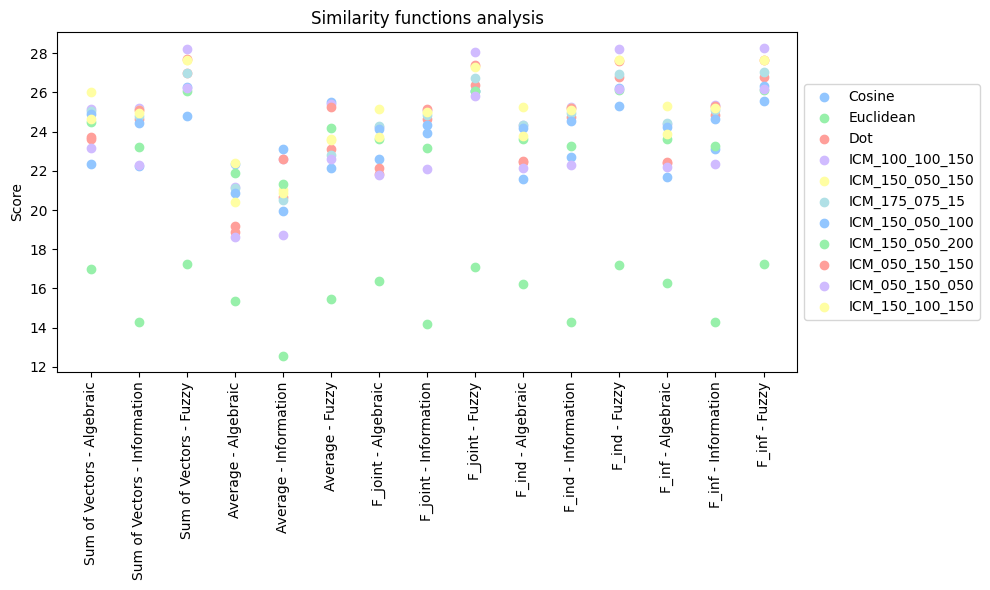

In [21]:
# Configurar el estilo y colores contrastantes
sns.set_palette("tab10")  # Utilizar una paleta de colores de Seaborn
plt.style.use('seaborn-pastel')

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
for columna in nuevo_df.columns:
    plt.scatter(nuevo_df.index, nuevo_df[columna], label=columna)

# Configurar etiquetas y título

plt.ylabel('Score')
plt.title('Similarity functions analysis')
plt.xticks(rotation='vertical')  # Rotar las etiquetas del eje X en vertical
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño
plt.savefig('/content/drive/MyDrive/colab/similarity_analysis.png', dpi=300)


plt.show()

# Star charts

In [22]:
print('Progress: 0%')
q = 0
# Define el número de cuadrantes
num_cuadrantes = 12
# Asignar colores a los cuadrantes
colors = ['coral', 'coral', 'coral', 'coral', 'aquamarine', 'aquamarine', 'aquamarine', 'aquamarine', 'aquamarine', 'steelblue', 'steelblue', 'steelblue']

theta=['Constraint 1 - Injectivity', 'Constraint 2 - Zero informativeness', 'Constraint 3 - Infinite informativeness', 'Constraint 4 - Upper and lower bounds',
          'Constraint 5 - Commutativity', 'Constraint 6 - Associativity', 'Constraint 7 - Distributiveness', 'Constraint 8 - Idempotency',
          'Constraint 9 - Identity', 'Constraint 10 - Similarity monotonicity', 'Constraint 11 - Self-similarity', 'Constraint 12 - Asymmetricity']


for i in range(165):
  q += 1
  df = pd.DataFrame(dict(
      r=normalized_results.iloc[:12, i],
      theta=['Constraint 1 - Injectivity', 'Constraint 2 - Zero informativeness', 'Constraint 3 - Infinite informativeness', 'Constraint 4 - Upper and lower bounds',
          'Constraint 5 - Commutativity', 'Constraint 6 - Associativity', 'Constraint 7 - Distributiveness', 'Constraint 8 - Idempotency',
          'Constraint 9 - Identity', 'Constraint 10 - Similarity monotonicity', 'Constraint 11 - Self-similarity', 'Constraint 12 - Asymmetricity']))
   # Crear el gráfico polar
  fig = go.Figure()

  for pp in range(num_cuadrantes):
      r1_data = df.iloc[pp]['r']
      theta_data = df.iloc[pp]['theta']
      # Agregar la serie 1 al gráfico
      fig.add_trace(go.Barpolar(
          r=[r1_data, 0],  # Los datos de la serie 1 y un valor cero para el centro del gráfico
          theta=[theta_data, theta_data],  # Las coordenadas angulares
          name='Serie 1',
          marker_color=colors[pp % len(colors)],  # Selecciona un color para el cuadrante
          showlegend=False  # No mostrar la leyenda para cada cuadrante
      ))

  # Personaliza el diseño del gráfico polar
  fig.update_layout(
      polar=dict(
          radialaxis=dict(range=[0, 1]),
          angularaxis=dict(direction="clockwise", showline=False)
      ),
      title=normalized_results.columns[i] + ' - Aggregated results',
      title_x=0.5,
      title_y=0.99
  )
  fig.write_image('/content/drive/MyDrive/colab/star2/' + normalized_results.columns[i] + ' - Sequences results.png', width=1500, height=1080)


  df = pd.DataFrame(dict(
      r=normalized_results.iloc[12:24, i],
      theta=['Constraint 1 - Injectivity', 'Constraint 2 - Zero informativeness', 'Constraint 3 - Infinite informativeness', 'Constraint 4 - Upper and lower bounds',
          'Constraint 5 - Commutativity', 'Constraint 6 - Associativity', 'Constraint 7 - Distributiveness', 'Constraint 8 - Idempotency',
          'Constraint 9 - Identity', 'Constraint 10 - Similarity monotonicity', 'Constraint 11 - Self-similarity', 'Constraint 12 - Asymmetricity']))
   # Crear el gráfico polar
  fig = go.Figure()

  for pp in range(num_cuadrantes):
      r1_data = df.iloc[pp]['r']
      theta_data = df.iloc[pp]['theta']
      # Agregar la serie 1 al gráfico
      fig.add_trace(go.Barpolar(
          r=[r1_data, 0],  # Los datos de la serie 1 y un valor cero para el centro del gráfico
          theta=[theta_data, theta_data],  # Las coordenadas angulares
          name='Serie 1',
          marker_color=colors[pp % len(colors)],  # Selecciona un color para el cuadrante
          showlegend=False  # No mostrar la leyenda para cada cuadrante
      ))

  # Personaliza el diseño del gráfico polar
  fig.update_layout(
      polar=dict(
          radialaxis=dict(range=[0, 1]),
          angularaxis=dict(direction="clockwise", showline=False)
      ),
      title=normalized_results.columns[i] + ' - Aggregated results',
      title_x=0.5,
      title_y=0.99
  )
  fig.write_image('/content/drive/MyDrive/colab/star2/' + normalized_results.columns[i] + ' - Ancestors results.png', width=1500, height=1080)


  df = pd.DataFrame(dict(
      r=normalized_results.iloc[24:36, i],
      theta=['Constraint 1 - Injectivity', 'Constraint 2 - Zero informativeness', 'Constraint 3 - Infinite informativeness', 'Constraint 4 - Upper and lower bounds',
          'Constraint 5 - Commutativity', 'Constraint 6 - Associativity', 'Constraint 7 - Distributiveness', 'Constraint 8 - Idempotency',
          'Constraint 9 - Identity', 'Constraint 10 - Similarity monotonicity', 'Constraint 11 - Self-similarity', 'Constraint 12 - Asymmetricity']))
   # Crear el gráfico polar
  fig = go.Figure()

  for pp in range(num_cuadrantes):
      r1_data = df.iloc[pp]['r']
      theta_data = df.iloc[pp]['theta']
      # Agregar la serie 1 al gráfico
      fig.add_trace(go.Barpolar(
          r=[r1_data, 0],  # Los datos de la serie 1 y un valor cero para el centro del gráfico
          theta=[theta_data, theta_data],  # Las coordenadas angulares
          name='Serie 1',
          marker_color=colors[pp % len(colors)],  # Selecciona un color para el cuadrante
          showlegend=False  # No mostrar la leyenda para cada cuadrante
      ))

  # Personaliza el diseño del gráfico polar
  fig.update_layout(
      polar=dict(
          radialaxis=dict(range=[0, 1]),
          angularaxis=dict(direction="clockwise", showline=False)
      ),
      title=normalized_results.columns[i] + ' - Aggregated results',
      title_x=0.5,
      title_y=0.99
  )
  fig.write_image('/content/drive/MyDrive/colab/star2/' + normalized_results.columns[i] + ' - Summaries results.png', width=1500, height=1080)


  df = pd.DataFrame(dict(
      r=(normalized_results.iloc[:12, i] + normalized_results.iloc[12:24, i] + normalized_results.iloc[24:36, i]) / 3,
      theta=['Constraint 1 - Injectivity', 'Constraint 2 - Zero informativeness', 'Constraint 3 - Infinite informativeness', 'Constraint 4 - Upper and lower bounds',
          'Constraint 5 - Commutativity', 'Constraint 6 - Associativity', 'Constraint 7 - Distributiveness', 'Constraint 8 - Idempotency',
          'Constraint 9 - Identity', 'Constraint 10 - Similarity monotonicity', 'Constraint 11 - Self-similarity', 'Constraint 12 - Asymmetricity']))

  # Crear el gráfico polar
  fig = go.Figure()

  for pp in range(num_cuadrantes):
      r1_data = df.iloc[pp]['r']
      theta_data = df.iloc[pp]['theta']
      # Agregar la serie 1 al gráfico
      fig.add_trace(go.Barpolar(
          r=[r1_data, 0],  # Los datos de la serie 1 y un valor cero para el centro del gráfico
          theta=[theta_data, theta_data],  # Las coordenadas angulares
          name='Serie 1',
          marker_color=colors[pp % len(colors)],  # Selecciona un color para el cuadrante
          showlegend=False  # No mostrar la leyenda para cada cuadrante
      ))

  # Personaliza el diseño del gráfico polar
  fig.update_layout(
      polar=dict(
          radialaxis=dict(range=[0, 1]),
          angularaxis=dict(direction="clockwise", showline=False)
      ),
      title=normalized_results.columns[i] + ' - Aggregated results',
      title_x=0.5,
      title_y=0.99
  )
  fig.write_image('/content/drive/MyDrive/colab/star2/' + normalized_results.columns[i] + ' - Aggregated results.png', width=1500, height=1080)
  #fig.show()

  if q % 8 == 0:
   print('Progress: ' + str(round(q*100/165,2)) + '%')
print('Progress: 100%!')

Progress: 0%
Progress: 4.85%
Progress: 9.7%
Progress: 14.55%
Progress: 19.39%
Progress: 24.24%
Progress: 29.09%
Progress: 33.94%
Progress: 38.79%
Progress: 43.64%
Progress: 48.48%
Progress: 53.33%
Progress: 58.18%
Progress: 63.03%
Progress: 67.88%
Progress: 72.73%
Progress: 77.58%
Progress: 82.42%
Progress: 87.27%
Progress: 92.12%
Progress: 96.97%
Progress: 100%!
